# Python - Classification Template

This notebook is a template for **Classification Machine Learning Case**. Almost all of functions and methods are self defined.

So if problem occurs (such as unknown functions), please type * **SHIFT + TAB** above the function * to read the documentation.

## A. Load Libraries

In [29]:
# Importing The Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Importing The Data Processing Libraries
import pandas as pd
from util import dataset, get_categorical, get_numerical, check_values, outlier_handling, dupli_missing, drop, information_value, label, normalization, train_test_preparation, evaluation

## B. Load Dataset

In [2]:
# Defining file directory
file_dir = 'Dataset/application_train.csv'

In [3]:
# Loading The Dataset
df = dataset(file_dir)
df.head()

Rows: 307511 , Columns: 122 

Column Names and Types:
 SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 i

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Define ID Columns
id_col = ['SK_ID_CURR']

# Define Target Column
target_col = 'TARGET'

# Define Non-feature Columns
exception = id_col
exception.append(target_col)

# Define Numerical Columns
num_cols = get_numerical(df, exception, threshold=15)

# Define Categorical Columns
cat_cols = get_categorical(df, exception, threshold=15)

## C. Value Checking

In [5]:
# Checking Values inside The Dataframe
check_values(df, target=target_col)

DUPLICATED ROWS
Number of duplicated rows: 0 


MISSING VALUES
Number of cols containing missing values: 64


,index,0,missing_percent
47,COMMONAREA_AVG,214865,69.87
61,COMMONAREA_MODE,214865,69.87
75,COMMONAREA_MEDI,214865,69.87
69,NONLIVINGAPARTMENTS_MODE,213514,69.43
55,NONLIVINGAPARTMENTS_AVG,213514,69.43
83,NONLIVINGAPARTMENTS_MEDI,213514,69.43
85,FONDKAPREMONT_MODE,210295,68.39
67,LIVINGAPARTMENTS_MODE,210199,68.35
81,LIVINGAPARTMENTS_MEDI,210199,68.35
53,LIVINGAPARTMENTS_AVG,210199,68.35


## D. Feature Engineering

In [6]:
# Handling Outliers
dataframe = outlier_handling(df, num_cols=num_cols, lower=True, upper=True)

In [7]:
dataframe = drop(dataframe, drop_threshold=0.3)

# Define Numerical Columns
clean_num_cols = get_numerical(dataframe, exception, threshold=15)

# Define Categorical Columns
clean_cat_cols = get_categorical(dataframe, exception, threshold=15)

In [8]:
# Labeling The Columns
dataframe = label(dataframe, clean_cat_cols)

In [9]:
# Handling Duplications and Missing Values
dataframe = dupli_missing(dataframe, clean_num_cols, duplicated=False, fill_method='mode')

dataframe = dupli_missing(dataframe, clean_cat_cols, duplicated=False, fill_method='median')

In [10]:
# Combining The Columns
feat_cols = clean_num_cols + clean_cat_cols

In [11]:
# Selecting The Most Affecting Columns toward Target
feature = information_value(dataframe, feat_cols, target_col, weak_predictor=True)

C:\Users\Acer\Jupyterlab Work Station\Template\classification_util.py:485: RuntimeWarning: divide by zero encountered in log
  d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
C:\Users\Acer\Jupyterlab Work Station\Template\classification_util.py:486: RuntimeWarning: divide by zero encountered in log
  d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
C:\Users\Acer\Jupyterlab Work Station\Template\classification_util.py:520: RuntimeWarning: divide by zero encountered in log
  d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
C:\Users\Acer\Jupyterlab Work Station\Template\classification_util.py:521: RuntimeWarning: divide by zero encountered in log
  d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)


In [12]:
# Redefining the columns which are processed by the Information Value
final_num_cols = get_numerical(feature, exception, threshold=12)

final_cat_cols = get_categorical(feature, exception, threshold=12)

In [13]:
# Normalizing Values of Numerical Columns
feature = normalization(feature, final_num_cols, standardize=True)

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Acer\Jupyterlab Work Station\Template\classification_util.py:651: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe.loc.__setitem__((slice(None), (num_cols)), std_updater)


In [30]:
# Transforming The Categorical Features to Dummies
feature = pd.get_dummies(feature, columns=final_cat_cols, drop_first=True)

## E. Train-Test and Sampling

In [31]:
# Defining The Target
target = dataframe[target_col]

# Checking The Target whether it is Imbalance or not
target.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [32]:
# Splitting The Dataframe to Train-Test sets and Handling Imbalanced Data
X_train, X_test, y_train, y_test = train_test_preparation(feature, target, test_size=None, imbalanced=True, random_state=151)

## F. Modeling

### 1. Logistic Regression

In [17]:
lgc = LogisticRegression()
lgc.fit(X_train, y_train)
y_pred_lg = lgc.predict(X_test)

### 2. Random Forest Classifier

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

### 3. Gradient Boosting Classifier

In [36]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gb = gbc.predict(X_test)

## G. Evaluation

#### Logistic Regression

[[37869 18761]
 [ 1758  3115]]

Area Under Curve
AUC         : 71.04%

Confusion Matrix Evaluation
Accuracy    : 66.64%
Recall      : 63.92%
Specificity : 66.87%
Precision   : 14.24%
Log Loss    : 11.523 



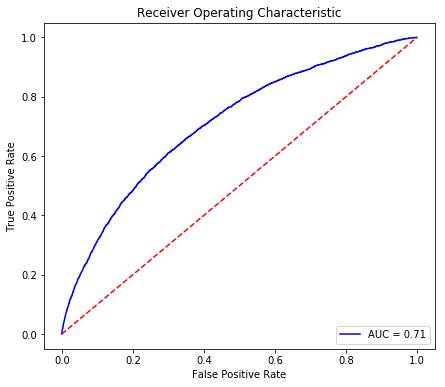

In [21]:
evaluation(y_test, y_pred_lg, X_test, lgc)

#### Random Forest Classifier

[[52202  4428]
 [ 3933   940]]

Area Under Curve
AUC         : 64.94%

Confusion Matrix Evaluation
Accuracy    : 86.41%
Recall      : 19.29%
Specificity : 92.18%
Precision   : 17.51%
Log Loss    : 4.695 



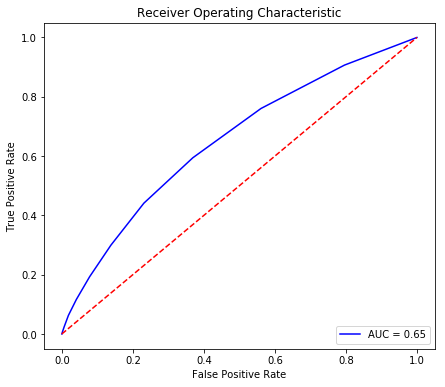

In [23]:
evaluation(y_test, y_pred_rfc, X_test, rfc)

#### Gradient Boosting Classifier

[[43332 13298]
 [ 2444  2429]]

Area Under Curve
AUC         : 69.22%

Confusion Matrix Evaluation
Accuracy    : 74.40%
Recall      : 49.85%
Specificity : 76.52%
Precision   : 15.44%
Log Loss    : 8.841 



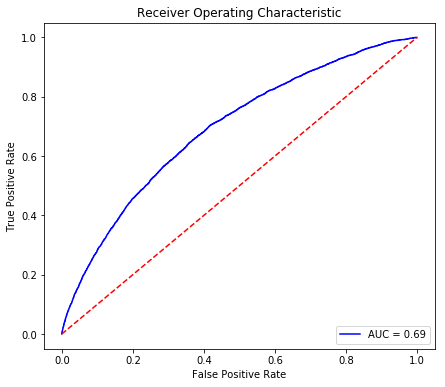

In [37]:
evaluation(y_test, y_pred_gb, X_test, gbc)